In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [39]:
batting = pd.read_csv('data/core/Batting.csv')
batting = batting[batting['yearID'] > 1980]
batting = batting[batting['yearID'] < 2020]
batting

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
58328,aasedo01,1981,1,CAL,AL,39,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
58329,abbotgl01,1981,1,SEA,AL,22,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
58330,adamsgl01,1981,1,MIN,AL,72,220,13,46,10,...,24.0,0.0,1.0,20,26.0,4.0,0.0,0.0,2.0,10.0
58331,agostju01,1981,1,CHA,AL,2,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
58332,aguaylu01,1981,1,PHI,NL,45,84,11,18,4,...,7.0,1.0,0.0,6,15.0,0.0,2.0,2.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107424,zimmejo02,2019,1,DET,AL,23,2,0,0,0,...,0.0,0.0,0.0,0,2.0,0.0,0.0,0.0,0.0,0.0
107425,zimmeky01,2019,1,KCA,AL,15,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
107426,zimmery01,2019,1,WAS,NL,52,171,20,44,9,...,27.0,0.0,0.0,17,39.0,0.0,0.0,0.0,2.0,4.0
107427,zobribe01,2019,1,CHN,NL,47,150,24,39,5,...,17.0,0.0,0.0,23,24.0,0.0,1.0,0.0,2.0,6.0


In [61]:
players_per_year = batting.groupby(by = 'yearID').count()['playerID']

In [62]:
hr_per_year = batting.groupby(by = 'yearID').sum()['HR']

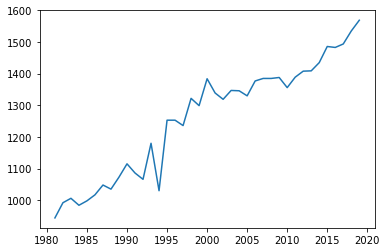

In [63]:
plt.plot(players_per_year)

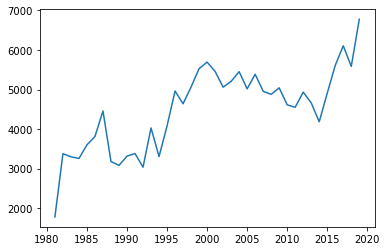

In [64]:
plt.plot(hr_per_year)

In [66]:
hr_per_player_per_year = hr_per_year / players_per_year

# Visualization 1

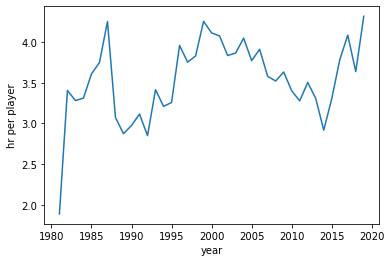

In [206]:
plt.xlabel('year')
plt.ylabel('hr per player')
plt.plot(hr_per_player_per_year)

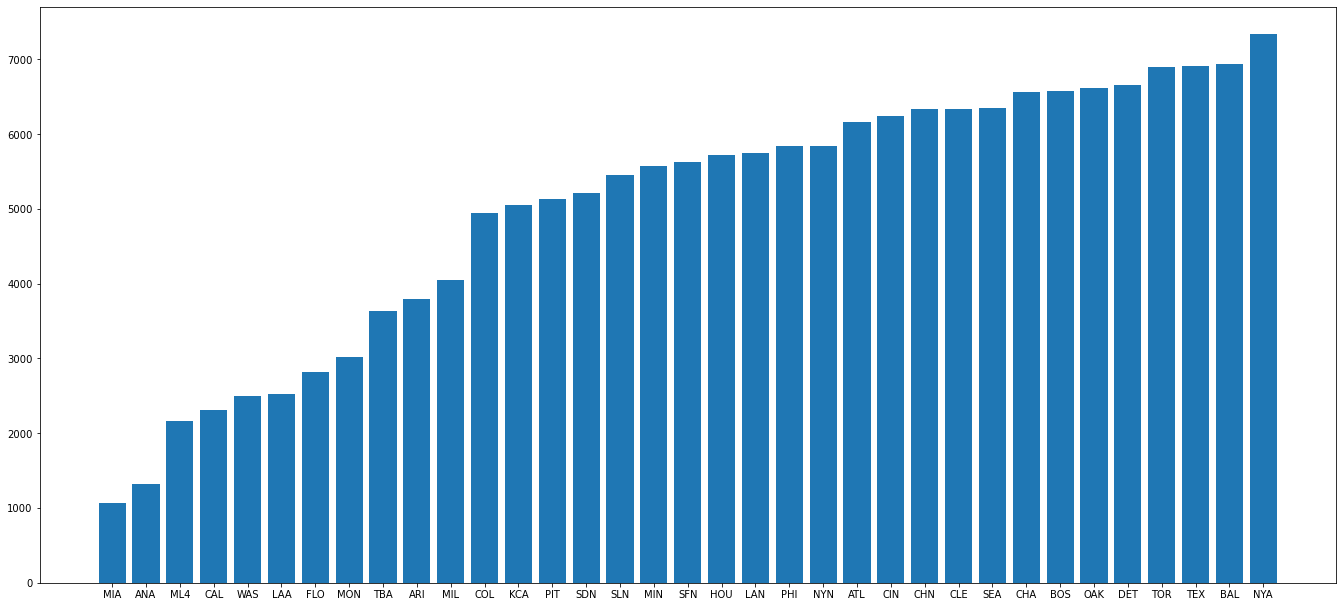

In [193]:
hr_per_team = batting.groupby(by = 'teamID').sum()['HR'].sort_values()
fig = plt.figure()
ax = fig.add_axes([0,0,3,2])
ax.bar(hr_per_team.index, hr_per_team.values)
plt.show()

In [194]:
salaries = pd.read_csv('data/core/Salaries.csv')
salaries = salaries[salaries['yearID'] > 2000]
salaries = salaries[salaries['salary'] > 0]
salaries

,yearID,teamID,lgID,playerID,salary
13099,2001,ANA,AL,anderga01,4500000
13100,2001,ANA,AL,barteki01,270000
13101,2001,ANA,AL,disarga01,320000
13102,2001,ANA,AL,eckstda01,200000
13103,2001,ANA,AL,erstada01,3450000
...,...,...,...,...,...
26423,2016,WAS,NL,strasst01,10400000
26424,2016,WAS,NL,taylomi02,524000
26425,2016,WAS,NL,treinbl01,524900
26426,2016,WAS,NL,werthja01,21733615


In [195]:
maxes = salaries.groupby(by = 'teamID').max()['salary']
mins = salaries.groupby(by = 'teamID').min()['salary']
means = salaries.groupby(by = 'teamID').mean()['salary'].sort_values()

diff = maxes - mins
diff = diff.sort_values()
salary_ratio = (maxes / mins).sort_values()
#salary_ratio

# Visualization 2

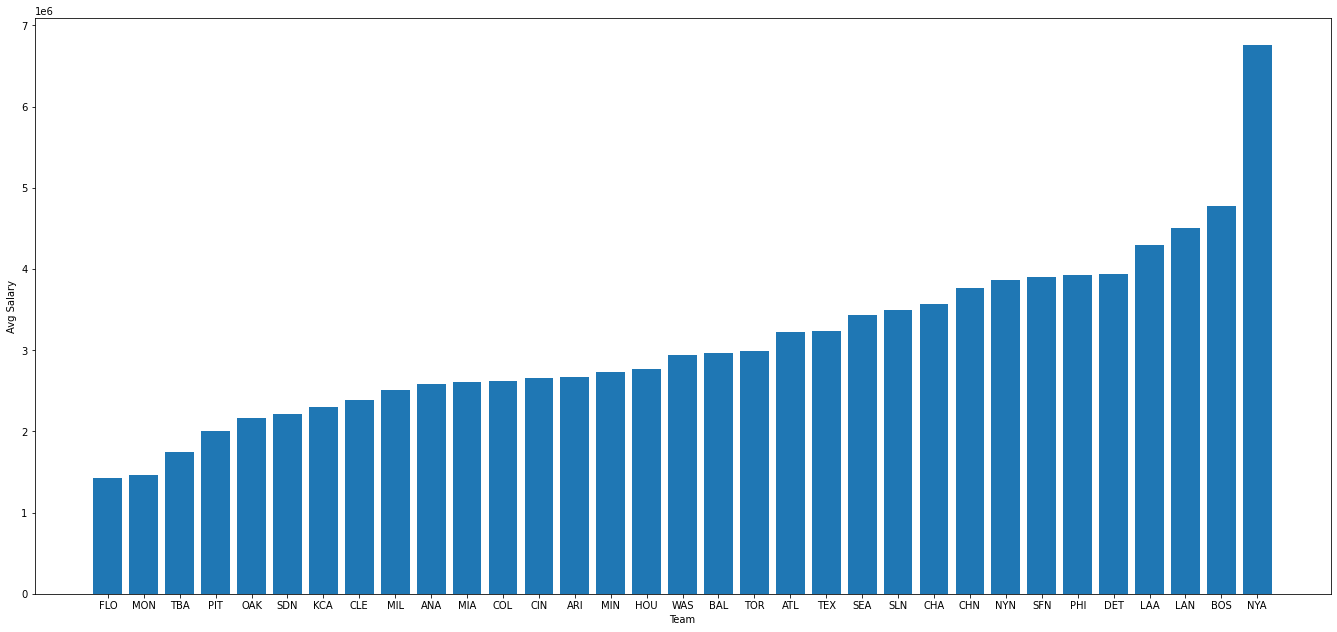

In [205]:
fig = plt.figure()
ax = fig.add_axes([0,0,3,2])
ax.bar(means.index, means.values)
plt.xlabel('Team')
plt.ylabel('Avg Salary')
plt.show()

In [203]:
'''
fig = plt.figure()
ax = fig.add_axes([0,0,4,2])
n= len(diff)
r = np.arange(n)
width = .5
  
plt.bar(r, list(mins.values), color = 'b', width = width, edgecolor = 'black', label='mins')
plt.bar(r + width, list(maxes.values), color = 'g', width = width, edgecolor = 'black', label='maxes')
  
plt.xlabel("Year")
plt.ylabel("salary")
plt.title("Anual Team Salaries")
  
# plt.grid(linestyle='--')
plt.xticks(r + width/2, mins.index)
plt.legend()
  
plt.show()
'''

'\nfig = plt.figure()\nax = fig.add_axes([0,0,4,2])\nn= len(diff)\nr = np.arange(n)\nwidth = .5\n  \nplt.bar(r, list(mins.values), color = \'b\', width = width, edgecolor = \'black\', label=\'mins\')\nplt.bar(r + width, list(maxes.values), color = \'g\', width = width, edgecolor = \'black\', label=\'maxes\')\n  \nplt.xlabel("Year")\nplt.ylabel("salary")\nplt.title("Anual Team Salaries")\n  \n# plt.grid(linestyle=\'--\')\nplt.xticks(r + width/2, mins.index)\nplt.legend()\n  \nplt.show()\n'